# EDA

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable as stb


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv ('datos/travel_insurance.csv')

In [3]:
df.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
17728,JZI,Airlines,Online,Basic Plan,No,62,THAILAND,33.0,11.55,M,47
34180,C2B,Airlines,Online,Bronze Plan,No,21,SINGAPORE,53.5,13.38,M,30
24911,EPX,Travel Agency,Online,1 way Comprehensive Plan,No,15,UNITED STATES,20.0,0.00,NaN,46
14103,EPX,Travel Agency,Online,1 way Comprehensive Plan,No,4,SINGAPORE,20.0,0.00,NaN,64
27245,EPX,Travel Agency,Online,1 way Comprehensive Plan,No,5,OMAN,68.0,0.00,NaN,36


In [4]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

Descripción de columnas:

- Target: Claim Status (Claim.Status)
- Name of agency (Agency)
- Type of travel insurance agencies (Agency.Type)
- Distribution channel of travel insurance agencies (Distribution.Channel)
- Name of the travel insurance products (Product.Name)
- Duration of travel (Duration)
- Destination of travel (Destination)
- Amount of sales of travel insurance policies (Net.Sales)
- Commission received for travel insurance agency (Commission)
- Gender of insured (Gender)
- Age of insured (Age)

La variable respuesta será la columna 'Claim' que muestra si el seguro ha sido reclamado. Haciendo un recuento resulta que hay 921 reclamados frente a 54363 que no han reclamado.

In [5]:
df.Claim.value_counts()

No     62399
Yes      927
Name: Claim, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [7]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

Hay nulos en la columna 'gender', se gestionaran cuando se exploren las variables categóricas.

Duplicados: cuántos hay y qué porcentaje representan. Se eliminan.

In [8]:
df.duplicated().sum()

8042

In [9]:
(df.duplicated().sum()*100)/df.shape[0]

12.69936518965354

In [10]:
df.shape

(63326, 11)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,55284.000000,55284.000000,55284.000000,55284.000000
mean,52.715035,42.788716,10.680707,39.977932
std,106.413615,50.448570,20.676708,13.509125
min,-2.000000,-389.000000,0.000000,0.000000
25%,11.000000,19.167500,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.500000,11.880000,45.000000
max,4881.000000,810.000000,283.500000,118.000000


- **Net Sales**:  hay negativos en la columna Net Sales. Es imposible que haya precios de seguros negativos ni menores que la comisión de venta.

- **Duration**:  hay valores negativos pero es imposible que un viaje dure un tiempo negativo. Y en el otro extremo, el máximo de duration es de 4881 dias pero es imposible que un seguro de viaje dure 13 años.

- **Age**: el valor máximo que figura es 118 años, lo que también es casi imposible.

##### EDA de variables numéricas:


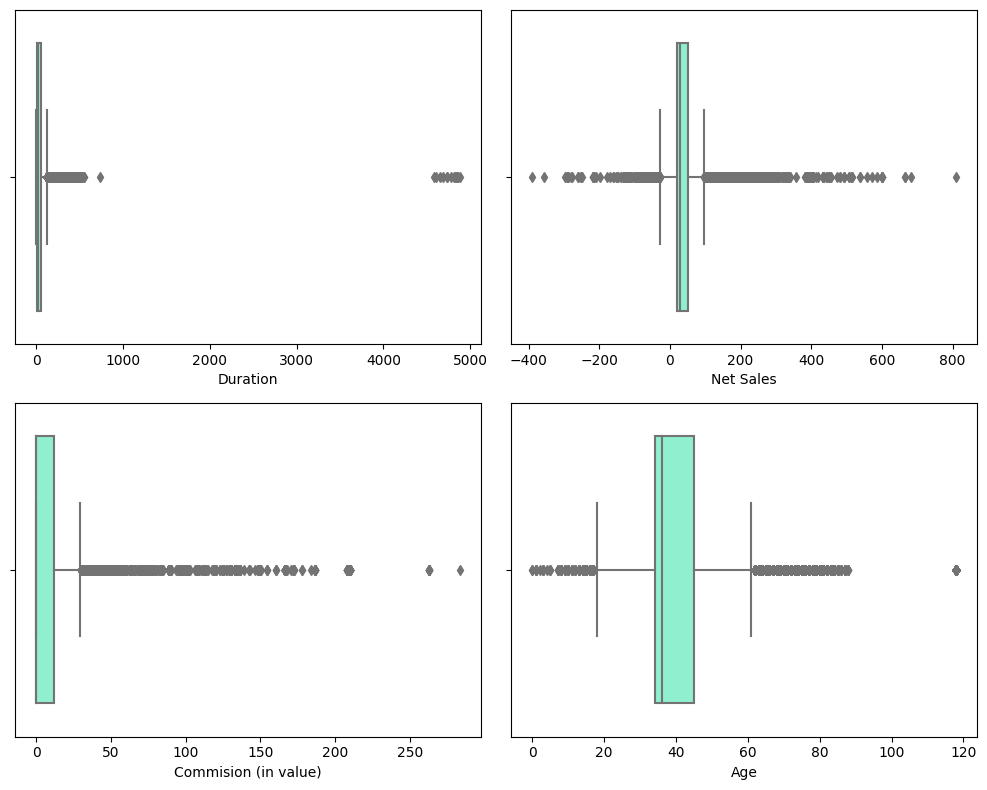

In [14]:
numericas=df.select_dtypes(include= np.number)

fig, axes = plt.subplots(2,2, figsize=(10,8))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); 
    
plt.tight_layout()

plt.show()

Tras comprobar visualmente los outlier, empieza la limpieza.
- **NetSales**: se eliminan todos los registros en los que el valor de NetSales sea negativo.

- **Duration**: se eliminan todos los registros cuya cantidad sea mayor de 30 dias, ya que es el máximo de días permitido en la mayoria de los seguros de viaje. También los de menos de 1 dia.

- **Commision**: se eliminan todos los registros cuya cantidad sea mayor que la de NetSales.

- **Age**: se eliminan todos los registros de más de 100 años.

In [15]:
df2= df[(df['Net Sales']>0) & (df['Duration']>1) & (df['Duration']<30) & (df['Commision (in value)']< df['Net Sales']) & (df['Age']<100)]

Visualización de variables numericas.

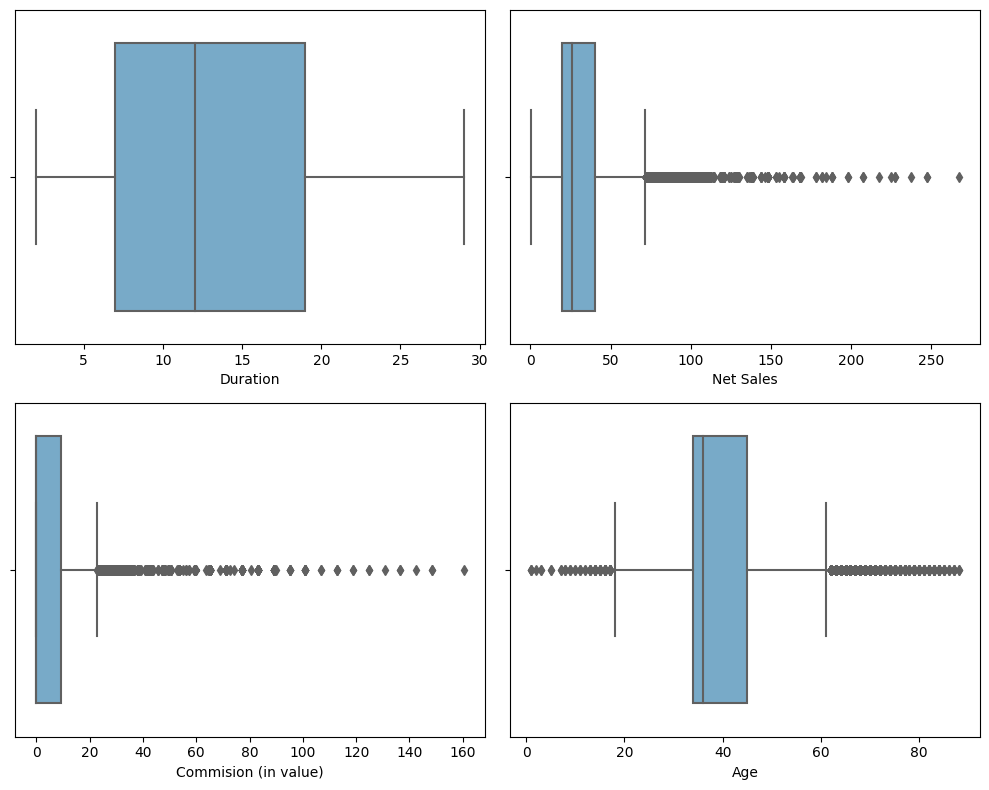

In [16]:
numericas2=df2.select_dtypes(include=np.number)
fig, axes = plt.subplots(2,2, figsize=(10,8))

axes = axes.flat

for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df2, ax=axes[indice], palette= "Blues"); 
    
plt.tight_layout()
#fig.delaxes(axes[-1])

plt.show()

Countplot de la variable respuesta.

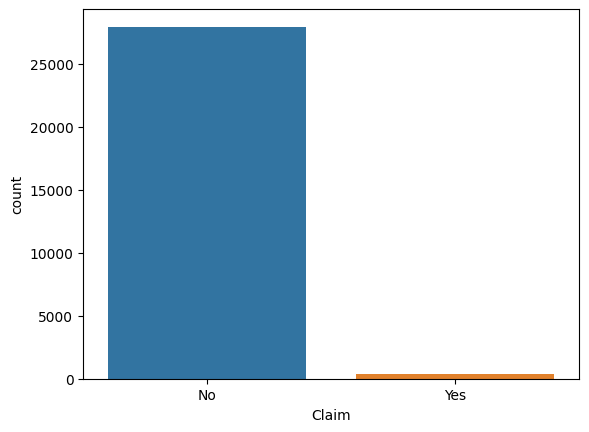

In [17]:
sns.countplot (data=df2, x='Claim' );

Como hay mucho desequilibrio, se investigan los registros reclamados para ver si se puede balancear de manera natural.

In [18]:
df3= df2[df2['Claim']=='Yes']

In [19]:
df3.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,M,34
248,C2B,Airlines,Online,Silver Plan,Yes,10,SINGAPORE,43.55,10.89,M,45
419,C2B,Airlines,Online,Silver Plan,Yes,11,SINGAPORE,62.25,15.56,M,33
462,EPX,Travel Agency,Online,2 way Comprehensive Plan,Yes,9,CHINA,87.00,0.00,NaN,36
601,C2B,Airlines,Online,Silver Plan,Yes,16,SINGAPORE,74.25,18.56,M,27


In [20]:
df3.shape

(391, 11)

In [21]:
df3.value_counts()

Agency  Agency Type    Distribution Channel  Product Name           Claim  Duration  Destination  Net Sales  Commision (in value)  Gender  Age
C2B     Airlines       Online                Bronze Plan            Yes    2         SINGAPORE    13.5       3.38                  M       37     1
                                             Silver Plan            Yes    12        SINGAPORE    48.5       12.13                 F       31     1
                                                                           13        SINGAPORE    54.5       13.63                 M       34     1
                                                                                                                                           25     1
                                                                                                                                   F       32     1
                                                                                                                     

In [22]:
df3.Agency.unique()

array(['C2B', 'EPX', 'CWT', 'JZI', 'SSI', 'KML', 'RAB', 'LWC', 'CCR',
       'TST'], dtype=object)

In [23]:
df3['Agency Type'].unique()

array(['Airlines', 'Travel Agency'], dtype=object)

In [24]:
df3['Distribution Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [25]:
df3.stb.freq (['Distribution Channel'], style=True )

,Distribution Channel,count,percent,cumulative_count,cumulative_percent
0,Online,386,98.72%,386,98.72%
1,Offline,5,1.28%,391,100.00%


La mayoría de seguros reclamados vienen de la venta online. Como hay tanto desequilibrio en los datos, se eliminan todos los NO reclamados que proceden de la venta. Se aplica el filtro sobre df2 que es df original limpio, y se denomina df global para evitar confusiones.

In [26]:
df_global = df2[df2['Distribution Channel']=='Online']

In [27]:
#revisión del desequilibrio
df_global['Claim'].value_counts()

No     27608
Yes      386
Name: Claim, dtype: int64

Exploración de edades de clientes que reclaman

In [28]:
df3.stb.freq (['Age'], style=True, thresh=60)

,Age,count,percent,cumulative_count,cumulative_percent
0,36.000000,63,16.11%,63,16.11%
1,30.000000,24,6.14%,87,22.25%
2,28.000000,19,4.86%,106,27.11%
3,31.000000,18,4.60%,124,31.71%
4,32.000000,17,4.35%,141,36.06%
5,26.000000,17,4.35%,158,40.41%
6,35.000000,14,3.58%,172,43.99%
7,27.000000,13,3.32%,185,47.31%
8,34.000000,12,3.07%,197,50.38%
9,37.000000,11,2.81%,208,53.20%


-----------------


##### EDA variables categóricas:

Se revisan los destinos del dataset global y solo para los reclamados.

In [29]:
df3.stb.freq (['Destination'], style=True )

,Destination,count,percent,cumulative_count,cumulative_percent
0,SINGAPORE,243,62.15%,243,62.15%
1,CHINA,22,5.63%,265,67.77%
2,MALAYSIA,19,4.86%,284,72.63%
3,AUSTRALIA,17,4.35%,301,76.98%
4,THAILAND,15,3.84%,316,80.82%
5,INDONESIA,9,2.30%,325,83.12%
6,VIET NAM,8,2.05%,333,85.17%
7,HONG KONG,8,2.05%,341,87.21%
8,UNITED KINGDOM,6,1.53%,347,88.75%
9,"KOREA, REPUBLIC OF",6,1.53%,353,90.28%


In [30]:
df_global.stb.freq (['Destination','Claim'], style=True )

,Destination,Claim,count,percent,cumulative_count,cumulative_percent
0,SINGAPORE,No,"6,029",21.54%,"6,029",21.54%
1,THAILAND,No,"2,807",10.03%,"8,836",31.56%
2,MALAYSIA,No,"2,552",9.12%,"11,388",40.68%
3,CHINA,No,"2,273",8.12%,"13,661",48.80%
4,INDONESIA,No,"1,717",6.13%,"15,378",54.93%
5,AUSTRALIA,No,"1,487",5.31%,"16,865",60.25%
6,HONG KONG,No,"1,260",4.50%,"18,125",64.75%
7,VIET NAM,No,919,3.28%,"19,044",68.03%
8,PHILIPPINES,No,898,3.21%,"19,942",71.24%
9,UNITED STATES,No,897,3.20%,"20,839",74.44%


Parece que no hay un patrón definitivo para los seguros reclamados por lo que solo se hará la división con la variable 'Distribution Channel' y se conservará un dataset de todos los seguros vendidos Online y otro dataset con los registros originales.  

Se mira la correlación por si hay alguna variable redundante.

In [31]:
df_global.corr()

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.213138,0.117545,-0.034872
Net Sales,0.213138,1.000000,0.510814,-0.020547
Commision (in value),0.117545,0.510814,1.000000,0.113656
Age,-0.034872,-0.020547,0.113656,1.000000


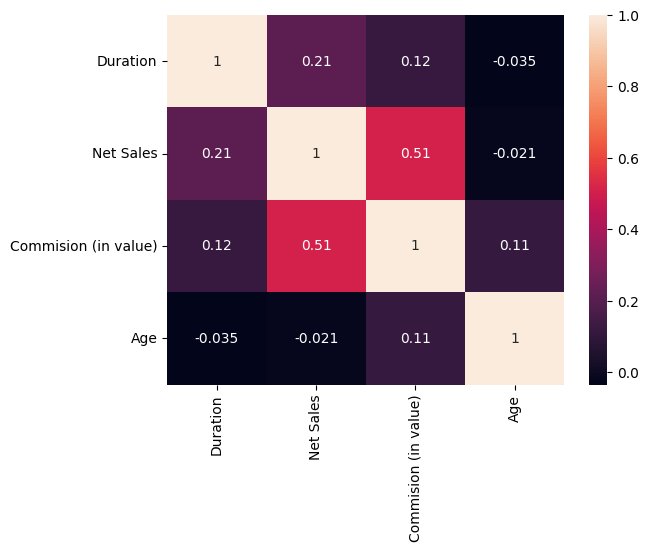

In [32]:
sns.heatmap ( df_global.corr(), annot=True);

No hay columnas redundantes.

In [33]:
df.describe(include='O')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Destination,Gender
count,55284,55284,55284,55284,55284,55284,16959
unique,16,2,2,26,2,149,2
top,EPX,Travel Agency,Online,Cancellation Plan,No,SINGAPORE,M
freq,28956,39098,54232,15308,54363,11539,8558


Se gestionan los nulos de 'Gender'.

In [34]:
df_global.Gender.isnull().sum()

19087

In [35]:
porcentaje_nulos=df_global.Gender.isnull().sum()/len(df_global.Gender)*100
porcentaje_nulos

68.18246767164392

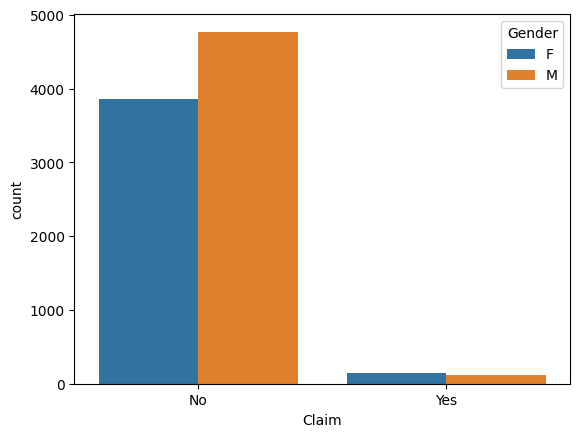

In [36]:
sns.countplot(data=df_global, x='Claim', hue='Gender');

Vemos que hay un 68% de nulos en la columna pero en este caso, se comprueba que el género no es determinante para reclamar el seguro, asi que se elimina esta variable.

In [37]:
df_global.drop(['Gender'], axis=1, inplace=True)

In [38]:
df_global.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,44
22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,25
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,34
26,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,29,UNITED STATES,9.90,5.94,33
27,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,28,UNITED STATES,9.90,5.94,33


### Guardado:

In [39]:
#df con reclamantes y no reclamantes
df_global.to_csv ('datos/df_global.csv')

In [40]:
# df solo con reclamantes
df3.to_csv('datos/df_claimed.csv')